In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
members = pd.read_csv('../data/SCoData_members_v1.2_2022_01.csv', encoding='utf-8')
events = pd.read_csv('../data/SCoData_events_v1.2_2022_01.csv', encoding='utf-8', low_memory=False)

In [3]:
total_members = len(members)
total_books = len(books)
total_events = len(events)

In [4]:
print('%d members' % len(members))

5235 members


In [5]:
print('%d books' % len(books))

6020 books


In [6]:
print('%d events' % len(events))

35523 events


In [7]:
def percent_known_members(df, field):
  total = len(df)
  with_field = len(members[members[field].notnull()])
  print('%d with %s : %.00f%%' % (with_field, field, (with_field/total)*100))
  return with_field

In [8]:
total_known = {}
for field in ['title', 'gender', 'birth_year', 'death_year', 'nationalities', 'viaf_url', 'wikipedia_url']:
    total_known[field] = percent_known_members(members, field)

print(total_known)

3673 with title : 70%
4039 with gender : 77%
561 with birth_year : 11%
544 with death_year : 10%
581 with nationalities : 11%
520 with viaf_url : 10%
358 with wikipedia_url : 7%
{'title': 3673, 'gender': 4039, 'birth_year': 561, 'death_year': 544, 'nationalities': 581, 'viaf_url': 520, 'wikipedia_url': 358}


In [9]:
def percent_known_books(df, field):
  total = len(df)
  with_field = len(books[books[field].notnull()])
  print('%d with %s : %.00f%%' % (with_field, field, (with_field/total)*100))
  return with_field

In [10]:
books.columns

Index(['uri', 'title', 'author', 'editor', 'translator', 'introduction',
       'illustrator', 'photographer', 'year', 'format', 'uncertain',
       'ebook_url', 'volumes_issues', 'notes', 'event_count', 'borrow_count',
       'purchase_count', 'circulation_years', 'updated'],
      dtype='object')

In [11]:
total_known_books = {}
for field in ['title', 'author', 'editor', 'year', 'photographer', 'illustrator', 'ebook_url']:
    total_known_books[field] = percent_known_books(books, field)

print(total_known_books)

6020 with title : 100%
5287 with author : 88%
424 with editor : 7%
5300 with year : 88%
2 with photographer : 0%
20 with illustrator : 0%
3155 with ebook_url : 52%
{'title': 6020, 'author': 5287, 'editor': 424, 'year': 5300, 'photographer': 2, 'illustrator': 20, 'ebook_url': 3155}


In [12]:
def percent_known_events(df, field):
  total = len(df)
  with_field = len(events[events[field].notnull()])
  print('%d with %s : %.00f%%' % (with_field, field, (with_field/total)*100))
  return with_field

In [13]:
events.columns

Index(['event_type', 'start_date', 'end_date', 'member_uris', 'member_names',
       'member_sort_names', 'subscription_price_paid', 'subscription_deposit',
       'subscription_duration', 'subscription_duration_days',
       'subscription_volumes', 'subscription_category',
       'subscription_purchase_date', 'reimbursement_refund', 'borrow_status',
       'borrow_duration_days', 'purchase_price', 'currency', 'item_uri',
       'item_title', 'item_volume', 'item_authors', 'item_year', 'item_notes',
       'source_type', 'source_citation', 'source_manifest', 'source_image'],
      dtype='object')

In [14]:
total_known_events = {}
for field in ['source_image', 'source_type', 'source_citation']:
    total_known_events[field] = percent_known_events(events, field)

24002 with source_image : 68%
35523 with source_type : 100%
35523 with source_citation : 100%


In [15]:
known_members = pd.DataFrame({'total': total_known})
known_members['percent'] = (known_members['total'] / len(members))*100
known_members = known_members.sort_values(by=['total'], ascending=False)
known_members.percent = known_members.percent.round(2)
known_members

,total,percent
gender,4039,77.15
title,3673,70.16
nationalities,581,11.10
birth_year,561,10.72
death_year,544,10.39
viaf_url,520,9.93
wikipedia_url,358,6.84


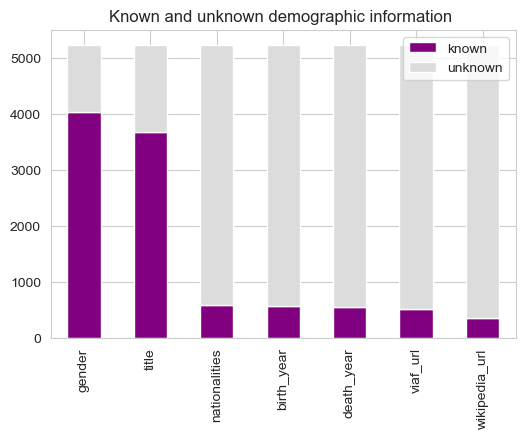

In [16]:
import matplotlib
total_members = len(members.index)
known_unknown_members = pd.DataFrame()
known_unknown_members['known'] = known_members['total']

known_unknown_members['unknown'] = known_members.total.apply(lambda x: total_members - x)

known_unknown_members.plot(kind='bar', title='Known and unknown demographic information ', stacked=True, color=['purple', 'gainsboro'], figsize=(6,4))
matplotlib.pyplot.savefig('known_unknown_demographics.svg')